In [1]:
import sys
!{sys.executable} -m pip install --upgrade matplotlib pandas pip
import matplotlib.pyplot as plt
import pandas as pd

  Using cached matplotlib-3.7.2-cp310-cp310-macosx_11_0_arm64.whl (7.3 MB)
  Using cached pandas-2.0.3-cp310-cp310-macosx_11_0_arm64.whl (10.8 MB)
  Using cached pip-23.2-py3-none-any.whl (2.1 MB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.0
    Uninstalling matplotlib-3.7.0:
      Successfully uninstalled matplotlib-3.7.0


In [2]:
!./results.sh
df = pd.read_csv("results/results.csv")

In [3]:
sr = df.to_dict(orient="records")

In [4]:
assert all([r["saved"] == 0 for r in sr if (not r["try_min"] and not r["try_max"]) or (not r["do_max"] and not r["try_min"]) or (r["do_max"] and not r["try_max"])])

In [5]:
dr = pd.merge(df, df, on=["num_inputs", "sn_type"]).to_dict(orient="records")

In [6]:
rs = [f'{r["num_inputs"]},{r["sn_type"]},{r["saved_x"]},{r["num_registers_x"]},{r["saved_y"]},{r["num_registers_y"]}' for r in dr if r["saved_x"] != r["saved_y"] and not r["do_max_x"] and r["do_max_y"] and r["try_min_x"] and not r["try_min_y"] and not r["try_max_x"] and r["try_max_y"]]
p = "num_inputs,sn_type,saved_min,num_registers_min,saved_max,num_registers_max\n"+"\n".join(rs)
print(p)

num_inputs,sn_type,saved_min,num_registers_min,saved_max,num_registers_max
3,jgamble_best,1,4,0,4
3,jgamble_bosenelson,1,4,0,4
3,jgamble_hibbard,0,4,1,4
3,batcher_opt3,1,4,0,4
3,bosenelson_normal,1,4,0,4
3,bosenelson_opt3,1,4,0,4
3,mirrored,0,4,1,4
4,r1,0,5,3,6
4,r2,0,5,2,6
5,jgamble_best,3,6,1,7
5,jgamble_bosenelson,3,6,1,7
5,jgamble_hibbard,0,6,3,6
5,batcher_opt3,3,6,1,7
5,bosenelson_normal,3,7,1,7
5,bosenelson_opt3,3,6,1,7
6,jgamble_best,3,8,1,7
6,jgamble_bosenelson,3,8,1,7
6,jgamble_hibbard,0,7,2,8
6,gap,0,7,2,8
6,good,3,8,1,7
6,batcher_opt3,3,8,1,7
6,bosenelson_normal,3,7,1,8
6,bosenelson_opt3,3,8,1,7
7,jgamble_best,4,9,1,9
7,jgamble_bosenelson,4,9,1,9
7,jgamble_hibbard,1,9,4,10
7,minout,2,10,1,9
7,batcher_opt3,4,9,1,9
7,bosenelson_normal,4,10,1,9
7,bosenelson_opt3,4,9,1,9
9,jgamble_bosenelson,8,12,5,13
9,jgamble_hibbard,1,11,8,12
9,gap,0,10,2,12
9,bad,0,10,2,12
9,good,0,10,2,12
9,minout,1,10,3,11
9,bosenelson_normal,8,13,5,13
10,jgamble_bosenelson,10,16,6,13
10,jgamble_hibbard,1,

In [7]:
assert all([r["saved_x"] == r["saved_y"] for r in dr if r["do_max_y"] == r["try_max_y"] and r["do_max_x"] == r["do_max_y"] and r["try_min_x"] and r["try_max_x"] and (r["try_min_y"] != r["try_max_y"])])

0.03728877987620017

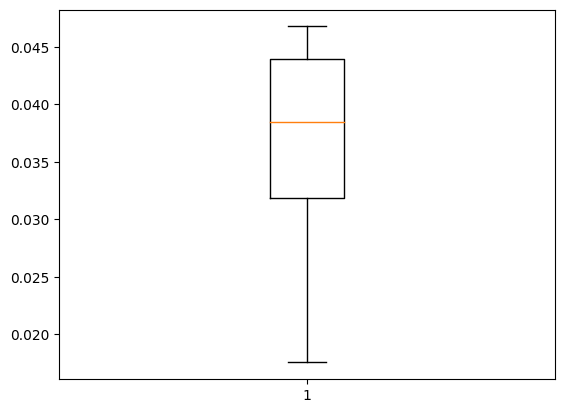

In [13]:
#TODO: graph num of extra registers vs instructions saved
saved_pct_min = [r["saved"]/(r["saved"]+r["length"]) for r in sr if not r["do_max"] and not r["try_max"] and r["try_min"]]
plt.boxplot(saved_pct_min)
sum(saved_pct_min) / len(saved_pct_min)

0.03821539397550761

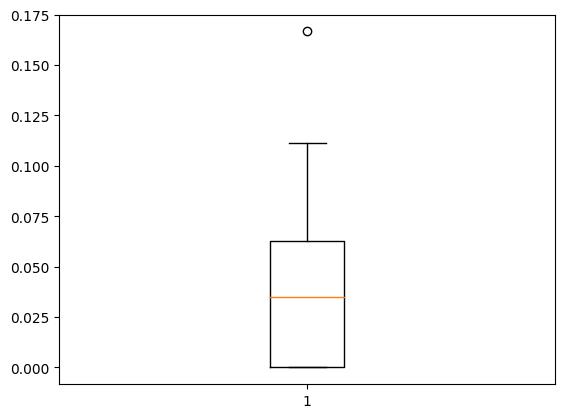

In [9]:
#TODO: graph num of extra registers vs instructions saved
saved_pct_max = [r["saved"]/(r["saved"]+r["length"]) for r in sr if r["do_max"] and r["try_max"] and not r["try_min"]]
plt.boxplot(saved_pct_max)
sum(saved_pct_max) / len(saved_pct_max)

0.3019099243013179

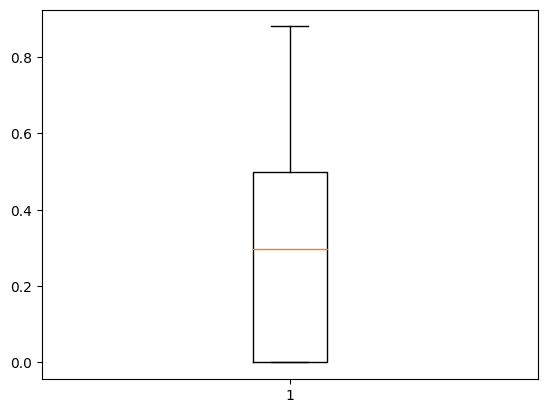

In [10]:
num_registers_pct = [r["num_registers"]/(1+r["num_inputs"])-1 for r in sr if r["do_max"] and r["try_max"] and not r["try_min"]]
plt.boxplot(num_registers_pct)
sum(num_registers_pct) / len(num_registers_pct)

In [11]:
#TODO: compile to Python for easy testing